# Pymaceuticals Inc.
---

### Analysis

 249 rats were monitored with growing tumors for 45 days, and given 10 different drug treatments, including a placebo. The test included a nearly equal amount of males and females, all ranging in age from 1 month to 24 months. The study revealed a strong correlation between weight and tumor volume, with the correlation coefficient being 0.84. Of the treatments, the 4 most notable was 'Capomulin', 'Ramicane', 'Infubinol', and 'Ceftamin'. Capomulin was the treatment plan of interest, which resulted in an average tumor volume of 40.68 mm3, and a median of roughly 41.56 mm3. Interestingly, Ramicane performed slightly better than Capomulin, with a slightly lower average tumor volume of 40.22 mm3, and a median of roughly 40.67 mm3. Comparatively, while Infubinol displayed a larger tumor volume average of 52.88 mm3, it indicated 31 potential outliers, that nearly matched the volume sizes of Ramicane and Capomulin. These findings suggest either success with the drug or potential discrepancies in drug administration or data recording, all warranting further investigation.
 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
# Checking the number of mice.

num_mice = combined_data["Mouse ID"].nunique()

print(num_mice)

249


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


# Find duplicate rows based on Mouse ID and Timepoint
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Get the unique Mouse IDs of the duplicate rows
duplicate_mice_ids = duplicate_rows['Mouse ID'].unique()

print("Duplicate mice by ID number:")
print(duplicate_mice_ids)

Duplicate mice by ID number:
['g989']


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]

display(duplicate_data)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# display(cleaned_data)
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice in the clean DataFrame. ##Should be 248  unique values

num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"There are {num_mice_cleaned} unique mice in the cleaned DataFrame.")


There are 249 unique mice in the cleaned DataFrame.


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
# Assemble the resulting series into a single summary DataFrame.
display(summary_stats)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])\
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
display(summary_stats_advanced)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

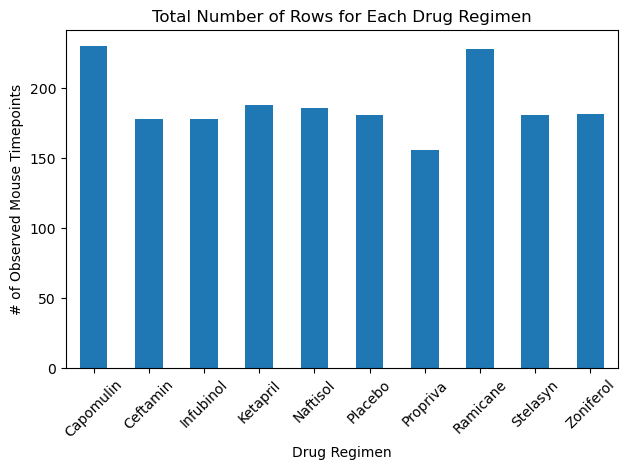

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Calculate the count of rows for each drug regimen
regimen_counts = cleaned_data.groupby('Drug Regimen').size()

# Plot the bar plot using Pandas
regimen_counts.plot(kind='bar')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

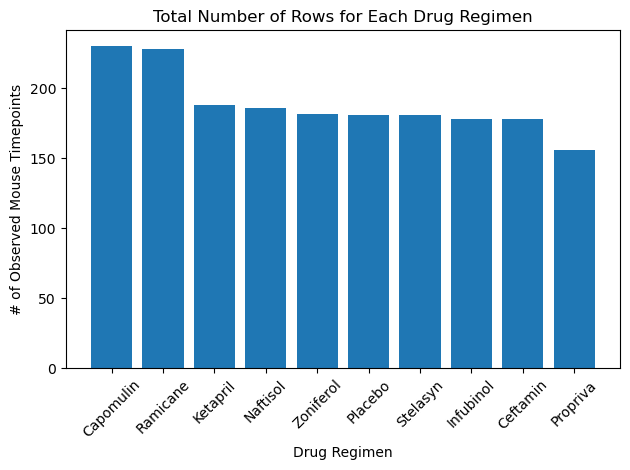

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Get unique drug regimens and their counts
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create an array of indices corresponding to the number of unique drug regimens
x_indices = np.arange(len(regimen_counts))

# Plot the bar plot
plt.bar(x_indices, regimen_counts)
plt.xticks(x_indices, regimen_counts.index, rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')


plt.tight_layout()
plt.show()

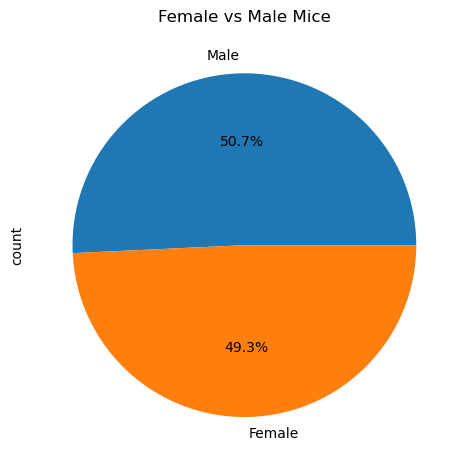

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculates the count of each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie plot using Pandas
gender_counts.plot(kind='pie',  autopct='%1.1f%%')
plt.title('Female vs Male Mice')

# Show the plot
plt.tight_layout()
plt.show()

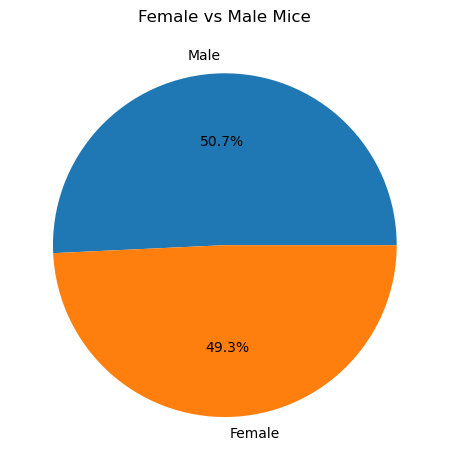

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the count of each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie plot using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Female vs Male Mice')


# Show the plot
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Filters for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]



display(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


In [86]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 

    
    
   
    # Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows 
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the tumor volume data 
    tumor_vol_data.append(tumor_vol)
    
    # Calculate quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers:")
    if outliers.empty:
        print("No potential outliers")
    else:
        print(outliers)
    print()  # New line for spacing


Capomulin's potential outliers:
No potential outliers

Ramicane's potential outliers:
No potential outliers

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
No potential outliers



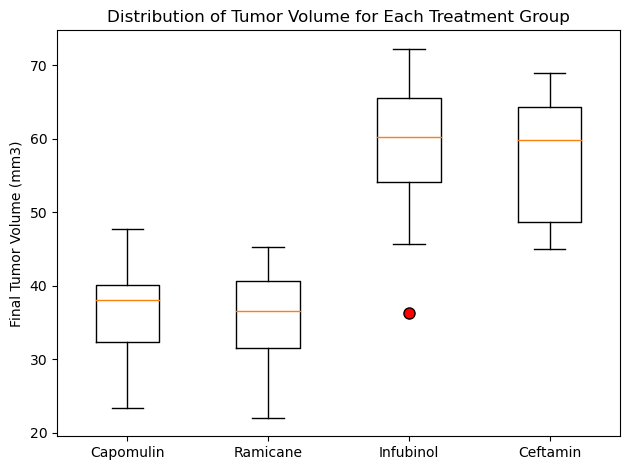

In [128]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')


#plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

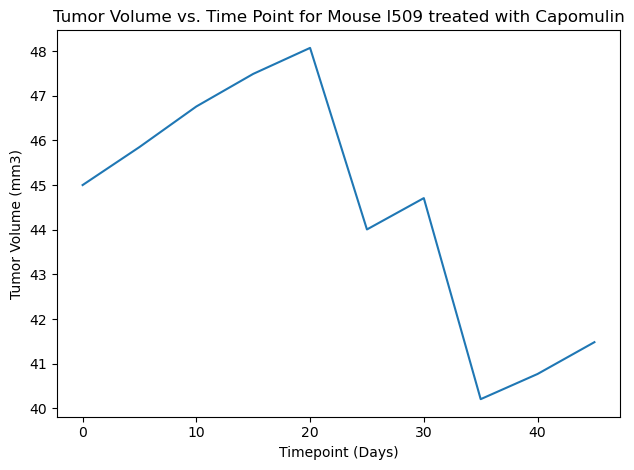

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a single mouse treated with Capomulin
mouse_id = 'l509'  

# Filter the data for the chosen mouse treated with Capomulin
capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id)]

# Plot the tumor volume vs. time point
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.tight_layout()
plt.show()


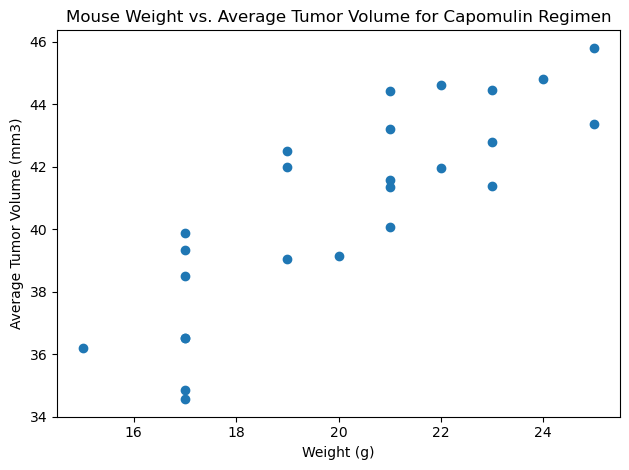

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


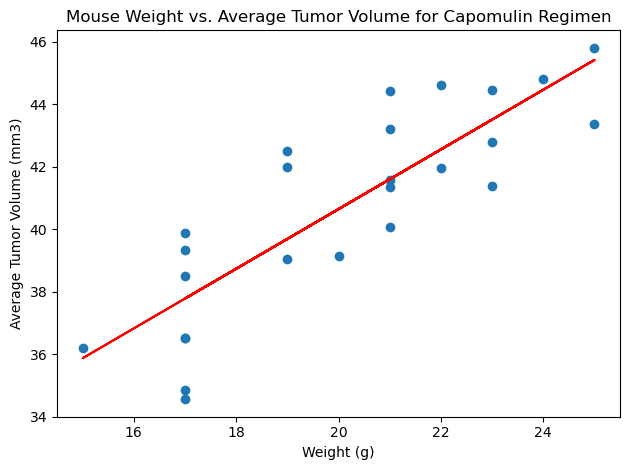

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation_coefficient,2)}")

# Perform linear regression
slope, intercept, _, _, _ = linregress(mouse_weight, avg_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Plot the regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



plt.tight_layout()
plt.show()